In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
from statistics import median

sns.set_style("darkgrid")

import matplotlib.dates as mdates
import numpy as np

In [145]:
readings = pd.read_csv("../data/readings.csv", index_col="id", parse_dates=['date'])
comments = pd.read_csv("../data/comments.csv", index_col="id", parse_dates=['created', 'updated'])
comments = comments.merge(readings[['url', 'week', 'part', 'date', 'required', 'speaker']], left_on="url_id", right_index=True)

In [147]:
comments

,url_id,user,text,created,updated,references,in_class,url,week,part,date,required,speaker
id,,,,,,,,,,,,,
okCHyM0pEeiHcCe5U-mqFg,1,cypriine,"Again, I failed to consider spiritual signific...",2018-10-11 07:45:33.369239,2018-10-11 07:45:33.369239,NaN,True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows
RbuzQs0pEeisvHdguLgNMQ,1,cypriine,"meaning: ""relating to, based on, or tracing an...",2018-10-11 07:42:58.154703,2018-10-11 07:42:58.154703,NaN,True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows
InkuCs0pEeiHb5vVqGgh9w,1,cypriine,"meaning: ""relating to, based on, or tracing an...",2018-10-11 07:41:59.010956,2018-10-11 07:41:59.010956,NaN,True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows
_ezxKs0oEeiHt2djdaaXGg,1,cypriine,"As a person with limited knowledge, I think it...",2018-10-11 07:40:57.695241,2018-10-11 07:40:57.695241,NaN,True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows
gHmFjM0oEeinm_sbPnJOrQ,1,cypriine,I think back to our reading last week and the ...,2018-10-11 07:37:27.228173,2018-10-11 07:37:27.228173,NaN,True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows
ZObmBM0mEei_uX_gtwy5ww,1,cypriine,I know this must be the fifth time I have comm...,2018-10-11 07:22:21.915521,2018-10-11 07:22:21.915521,NaN,True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows
MEXdhM0lEeiXmPMPqb4f6w,1,cypriine,The internal marginalization is a point that I...,2018-10-11 07:13:44.096651,2018-10-11 07:13:44.096651,NaN,True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows
Rms3Cs0jEeipGIdEvLOofQ,1,cypriine,"I agree, this is not a narrative (that I've re...",2018-10-11 07:00:02.041702,2018-10-11 07:00:02.041702,['ynR9Fsv-EeieggsJmorLKA'],True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows
Jk5BSM0iEeiUOT_AyRSUOw,1,cypriine,I am excited to see the authors unpack this.,2018-10-11 06:51:58.927103,2018-10-11 06:51:58.927103,NaN,True,https://www.scholcommlab.ca/wp-content/uploads...,6,2,2018-10-10,True,John Borrows


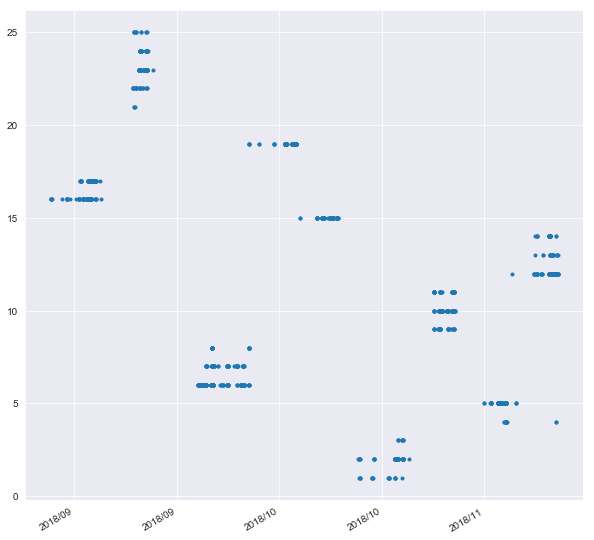

In [141]:
pdf = comments[comments.in_class == True]
fig, ax = plt.subplots(figsize=(10,10))
# sns.pointplot(x="created", y="url_id", hue="in_class", data=pdf, ci=None, join=False, ax=ax, marker=".")

ax.plot(pdf.created, pdf.url_id, marker=".", ls='')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
fig.autofmt_xdate()

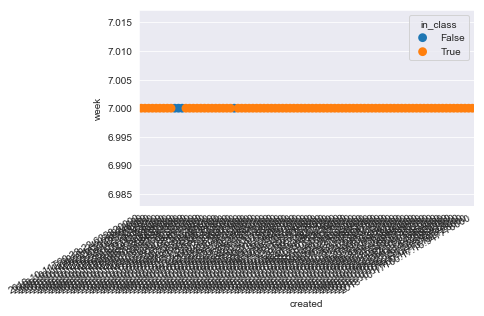

In [97]:
fig, ax = plt.subplots()

sns.pointplot(x="created", y="url_id", hue="in_class", data=pdf[pdf.week==7], ci=None, join=False, ax=ax, marker=".")

fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [98]:
pdf[pdf.week]

,url_id,user,text,created,updated,references,in_class,url,week,part,date,required,speaker
id,,,,,,,,,,,,,
gpSY0NiPEeiRfktTtGoN7Q,1,camilleweinsheimer,"I feel positive about the the ""attitudinal ben...",2018-10-25 19:52:31.678830,2018-10-25 19:52:31.678830,NaN,True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen
6PQqotfAEeimL1vOtpI1Gg,1,KariGustafson,(dis)abilty,2018-10-24 19:13:37.563649,2018-10-24 19:13:37.563649,['pWpXTtVYEeiWkQsZb1yAZg'],True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen
Q1Bg1te-EeiOYycEtOZHCA,1,KariGustafson,"Yes, with regard to public understanding of sc...",2018-10-24 18:54:40.746961,2018-10-24 18:54:40.746961,NaN,True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen
B5HCyNe6Eei9CBPXB5IlPQ,1,KariGustafson,"This seems really important, too. The nature o...",2018-10-24 18:24:22.499409,2018-10-24 18:24:22.499409,NaN,True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen
vzdL2Ne5Eeit3BueVVhaSQ,1,KariGustafson,This actually seems like a rather meaningful f...,2018-10-24 18:22:20.976149,2018-10-24 18:22:20.976149,NaN,True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen
VWEDfNchEeik7o_LSNDDmA,1,mawaters,A study within a study,2018-10-24 00:11:19.998306,2018-10-24 00:11:19.998306,NaN,True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen
CojnXNchEeiwaH-jyib1Ew,1,mawaters,I've taken classes in the past in University w...,2018-10-24 00:09:14.494503,2018-10-24 00:09:14.494503,NaN,True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen
I_MWtNcbEei_t8OjBr-yjg,1,mawaters,this seems like one of the first solutions to ...,2018-10-23 23:27:00.150701,2018-10-23 23:27:00.150701,NaN,True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen
5-Dn0NcSEeiVEMt2OFkETg,1,mawaters,I think all of these questions have great poss...,2018-10-23 22:28:03.412703,2018-10-23 22:28:03.412703,NaN,True,https://www.researchgate.net/profile/Tina_Phil...,8,2,2018-10-25,True,Shannon Dosemagen


In [103]:
comments.user.value_counts()

anastasiak            250
michelle_la           167
mawaters              110
aliceLF               105
KariGustafson          86
carina.albrecht        77
cypriine               77
linnteetzel            77
vreichsh               67
CSG                    62
camilleweinsheimer     58
Bubblbu                54
melissa_roach          36
emmisalive             20
micahvandegrift        16
juan                   14
gandalf511              8
KathyEssmiller          4
Cgursche                4
choppman1               3
pkatcef                 3
patrick19929            3
kprosser                1
Upstream_Salmons        1
Name: user, dtype: int64

In [107]:
comments.groupby("user")['text'].apply(lambda x: median([len(y) for y in x])).sort_values(ascending=False)

user
camilleweinsheimer    317.0
micahvandegrift       302.0
pkatcef               296.0
Bubblbu               286.5
melissa_roach         219.5
patrick19929          215.0
KariGustafson         211.5
linnteetzel           188.0
aliceLF               184.0
emmisalive            169.5
michelle_la           166.0
CSG                   140.0
vreichsh              139.0
Cgursche              130.0
cypriine              123.0
juan                  121.5
kprosser              117.0
choppman1             115.0
mawaters              108.0
anastasiak            101.5
carina.albrecht       100.0
gandalf511             86.5
Upstream_Salmons       20.0
KathyEssmiller         19.0
Name: text, dtype: float64